In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
import math
import pandas as pd
import mplhep as hep

hep.style.use("ALICE")

In [2]:
def plot_syst(x, ex, y, ey, ax, color, width):
    for i in range(len(x)):
        box_x = x[i] - ex
        box_y = y[i] - ey[i]
        box_width = 2 * ex
        box_height = 2 * ey[i]
        rect = patches.Rectangle((box_x, box_y), box_width, box_height, fill=False, edgecolor=color, linewidth=width)
        ax.add_patch(rect)

In [3]:
dfRatioPsi2sJpsiVsPtAllRuns = pd.read_csv('systematic_ratio_Full_syst.txt', sep=' ')
ptMinAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["x_min"]
ptMaxAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["x_max"]
ptAllRuns = (ptMinAllRuns + ptMaxAllRuns) / 2.
errPtAllRuns = (ptMaxAllRuns - ptMinAllRuns) / 2.

ratioPsi2sJpsiVsPtAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["val"]
statRatioPsi2sJpsiVsPtAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["stat"]
systRatioPsi2sJpsiVsPtAllRuns = dfRatioPsi2sJpsiVsPtAllRuns["syst"]

dfRatioPsi2sJpsiVsPtPrel = pd.read_csv('systematic_ratio_Run2_corrected.txt', sep=' ')
ptMinPrel = dfRatioPsi2sJpsiVsPtPrel["x_min"]
ptMaxPrel = dfRatioPsi2sJpsiVsPtPrel["x_max"]
ptPrel = (ptMinPrel + ptMaxPrel) / 2.
errPtPrel = (ptMaxPrel - ptMinPrel) / 2.

ratioPsi2sJpsiVsPtPrel = dfRatioPsi2sJpsiVsPtPrel["val"]
statRatioPsi2sJpsiVsPtPrel = dfRatioPsi2sJpsiVsPtPrel["stat"]
systRatioPsi2sJpsiVsPtPrel = dfRatioPsi2sJpsiVsPtPrel["syst"]


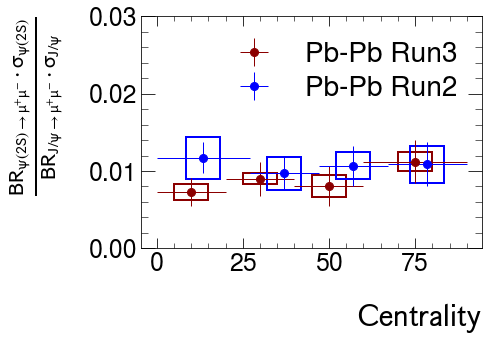

In [4]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(ptAllRuns, 5, ratioPsi2sJpsiVsPtAllRuns, systRatioPsi2sJpsiVsPtAllRuns, ax, 'darkred', 2)
plot_syst(ptPrel, 5, ratioPsi2sJpsiVsPtPrel, systRatioPsi2sJpsiVsPtPrel, ax, 'blue', 2)

plt.xlabel(r'$Centrality$') 
plt.ylabel(r'$\frac{\mathrm{BR}_{\psi(2S) \to \mu^{+}\mu^{-}} \cdot \sigma_{\psi(2S)}}{\mathrm{BR}_{\mathrm{J}/\psi \to \mu^{+}\mu^{-}} \cdot \sigma_{\mathrm{J}/\psi}}$')
plt.ylim(0.0, 0.03)
plt.errorbar(ptAllRuns, ratioPsi2sJpsiVsPtAllRuns, xerr=errPtAllRuns, yerr=statRatioPsi2sJpsiVsPtAllRuns, label="Pb-Pb Run3", fmt='o', color='darkred', ecolor='darkred')
plt.errorbar(ptPrel, ratioPsi2sJpsiVsPtPrel, xerr=errPtPrel, yerr=statRatioPsi2sJpsiVsPtPrel, label="Pb-Pb Run2", fmt='o', color='blue', ecolor='blue')
plt.legend(loc='upper right')
plt.show()